In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score,classification_report
from sklearn.utils import resample

In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv('gs://{}/data/creditcard.csv'.format('qwiklabs-gcp-ml-8d503f4cdc07'))

In [5]:
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [6]:
data.shape

(284807, 31)

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# 초기 데이터 분석(EDA)

In [8]:
from IPython.display import display
from ipywidgets import *

In [9]:
def g_boxplot(feature):
    sns.set(style="white", color_codes = True)
    g = sns.boxplot(x='Class', y=feature,  data=data, hue="Class")
interact(g_boxplot,feature = list(data))

interactive(children=(Dropdown(description='feature', options=('Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7…

<function __main__.g_boxplot(feature)>

In [ ]:
## 사기의심 클래스 비주얼 확인 결과 중요 feature --> 정상과 분포가 조금 다른 케이스 : V18, V17,V16, V12,V4

In [39]:
def g_pairplot(feature_1, feature_2):
    sns.set(style="white", color_codes = True)
    g = sns.pairplot(data, hue="Class",vars=[feature_1, feature_2], height=5)
interact(g_pairplot,feature_1 = list(data), feature_2 = list(data))

interactive(children=(Dropdown(description='feature_1', options=('Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', '…

<function __main__.g_pairplot(feature_1, feature_2)>

In [38]:
%matplotlib inline
def g_scatter_plot(feature_1, feature_2):
   plt.figure(figsize=(10,5))
   plt.xlabel(feature_1)
   plt.ylabel(feature_2)
   plt.scatter(data[data['Class']==0][feature_1], data[data['Class']==0][feature_2],c='b',marker='.',label='class 0')
   plt.scatter(data[data['Class']==1][feature_1], data[data['Class']==1][feature_2],c='r',marker='*',label='class 1')
   plt.legend()
interact(g_scatter_plot,feature_1 = list(data), feature_2 = list(data))

interactive(children=(Dropdown(description='feature_1', options=('Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', '…

<function __main__.g_scatter_plot(feature_1, feature_2)>

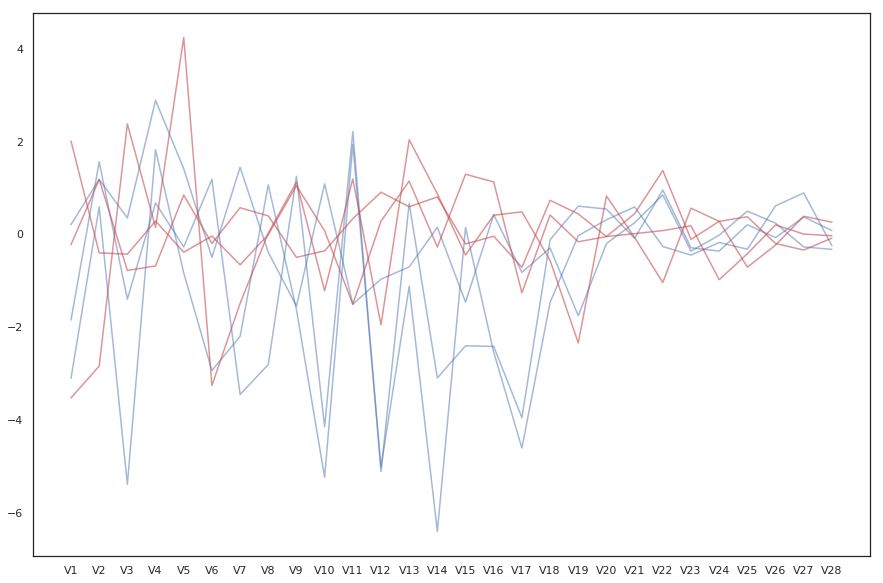

In [84]:

d_data = data.copy()
d_data = d_data.drop('Time',axis=1)
d_data = d_data.drop('Amount',axis=1)
a = d_data[d_data.Class ==1].sample(frac=1).head(3)
b = d_data[d_data.Class ==0].sample(frac=1).head(3)
a = a.drop('Class',axis=1)
b = b.drop('Class',axis=1)
plt.figure(figsize=(15,10))
plt.plot(a.T,c='b',label='Class 1', alpha=0.5)
plt.plot(b.T,c='r',label='Class 0', alpha=0.6)
plt.show()

In [61]:
def hist_plot(feature_1):
#     plt.set(style="white", color_codes = True)
    ax = sns.distplot(data[feature_1], bins=20)
interact(hist_plot, feature_1 = list(data))

interactive(children=(Dropdown(description='feature_1', options=('Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', '…

<function __main__.hist_plot(feature_1)>

In [12]:
%matplotlib inline
def joint_plot(feature_1, feature_2):
    sns.set(style="white", color_codes = True)
    g = sns.jointplot(x = feature_1, y= feature_2, data= data, color ='b',size = 7)
interact(joint_plot,feature_1 = list(data), feature_2 = list(data))

interactive(children=(Dropdown(description='feature_1', options=('Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', '…

<function __main__.joint_plot(feature_1, feature_2)>

In [16]:
%matplotlib inline
def joint_plot(feature_1, feature_2):
    sns.set(style="white", color_codes = True)
    g = sns.plot(x = feature_1, y= feature_2, data= data, color ='b',size = 7)
interact(joint_plot,feature_1 = list(data), feature_2 = list(data))

interactive(children=(Dropdown(description='feature_1', options=('Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', '…

<function __main__.joint_plot(feature_1, feature_2)>

In [13]:
print(data['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [15]:
sam.generate_correlation_dic(corr = 0.5)

NameError: name 'sam' is not defined

In [ ]:
### 데이터 쪼개기

In [ ]:
y = data['Class']
X = data.drop(['Class'], axis=1)
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [ ]:
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

#### 3-1. Generate synthetic samples

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=27, ratio=1.0)
SMOTE_X_train, SMOTE_y_train = sm.fit_sample(X_train, y_train)

In [ ]:
pd.Series(SMOTE_y_train).value_counts()

In [ ]:
## 모델 돌리기
SMOTEmodel = LogisticRegression(solver='liblinear').fit(SMOTE_X_train, SMOTE_y_train)
SMOTE_pred = SMOTEmodel.predict(X_test) 

In [ ]:
SMOTE_X_train = pd.DataFrame(SMOTE_X_train, columns=list(X_train))

In [ ]:
# 결과
print(pd.DataFrame(confusion_matrix(y_test, SMOTE_pred)))
print(classification_report(y_test, SMOTE_pred))

In [ ]:
def compare_sampling_hist_plot(feature):
    f, axes = plt.subplots(1, 2,figsize=(10,5))
    sns.distplot(X_train[feature], bins=20,ax=axes[0])
    sns.distplot(SMOTE_X_train[feature], bins=20,ax=axes[1],color='r') ## 샘플링된 데이터 --> 빨간색
interact(compare_sampling_hist_plot, feature = list(X_train))